In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score, f1_score, confusion_matrix, precision_recall_fscore_support, precision_score, recall_score
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np

In [2]:
df = pd.read_csv('out_put_3.csv')

In [3]:
df.head()

,DATE,CHANCE_OF_PRECIPITATION,TEMPERATURE,FEELS_LIKE_TEMPERATURE,WIND_GUST,VISIBILITY,HUMIDITY,UV,SPEED,B,S,W
0,2023-06-15 18:00:00,1,0.666667,0.666667,0.409091,1,0.405405,0.1,0.416667,1,0,0
1,2023-06-15 19:00:00,1,0.500000,0.500000,0.318182,1,0.594595,0.0,0.333333,1,0,0
2,2023-06-15 20:00:00,1,0.333333,0.333333,0.272727,1,0.648649,0.0,0.333333,1,0,0
3,2023-06-15 21:00:00,0,0.333333,0.333333,0.227273,1,0.702703,0.0,0.250000,1,0,0
4,2023-06-15 22:00:00,0,0.333333,0.333333,0.181818,1,0.756757,0.0,0.166667,1,0,0


## Part 2 Split Data

In [4]:
y = df['CHANCE_OF_PRECIPITATION']
X = df.drop(['CHANCE_OF_PRECIPITATION', 'DATE'], axis=1)

- y : the target variable is the column CHANCE_OF_PRECIPITATION
- X: Feature, DATE will not be counted as a feature

In [5]:
y

0      1
1      1
2      1
3      0
4      0
      ..
409    1
410    1
411    1
412    0
413    0
Name: CHANCE_OF_PRECIPITATION, Length: 414, dtype: int64

In [6]:
X

,TEMPERATURE,FEELS_LIKE_TEMPERATURE,WIND_GUST,VISIBILITY,HUMIDITY,UV,SPEED,B,S,W
0,0.666667,0.666667,0.409091,1,0.405405,0.1,0.416667,1,0,0
1,0.500000,0.500000,0.318182,1,0.594595,0.0,0.333333,1,0,0
2,0.333333,0.333333,0.272727,1,0.648649,0.0,0.333333,1,0,0
3,0.333333,0.333333,0.227273,1,0.702703,0.0,0.250000,1,0,0
4,0.333333,0.333333,0.181818,1,0.756757,0.0,0.166667,1,0,0
...,...,...,...,...,...,...,...,...,...,...
409,0.500000,0.333333,0.863636,1,0.486486,0.5,0.750000,1,0,0
410,0.666667,0.333333,1.000000,1,0.324324,0.6,1.000000,1,0,0
411,0.666667,0.500000,0.727273,0,0.486486,0.2,0.666667,0,0,1
412,0.333333,0.166667,0.454545,1,0.675676,0.0,0.416667,1,0,0


In [7]:
y.value_counts(normalize=True)

0    0.504831
1    0.495169
Name: CHANCE_OF_PRECIPITATION, dtype: float64

<Axes: >

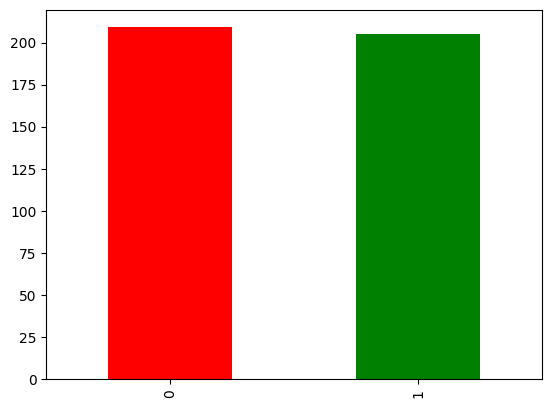

In [8]:
y.value_counts().plot.bar(color=['red', 'green'])

The ratio between the two variables 0 and 1 is quite similar

<ipython-input-9-ead424fd0d7d>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),linewidths=0.30,cmap ='RdYlGn',annot=True)


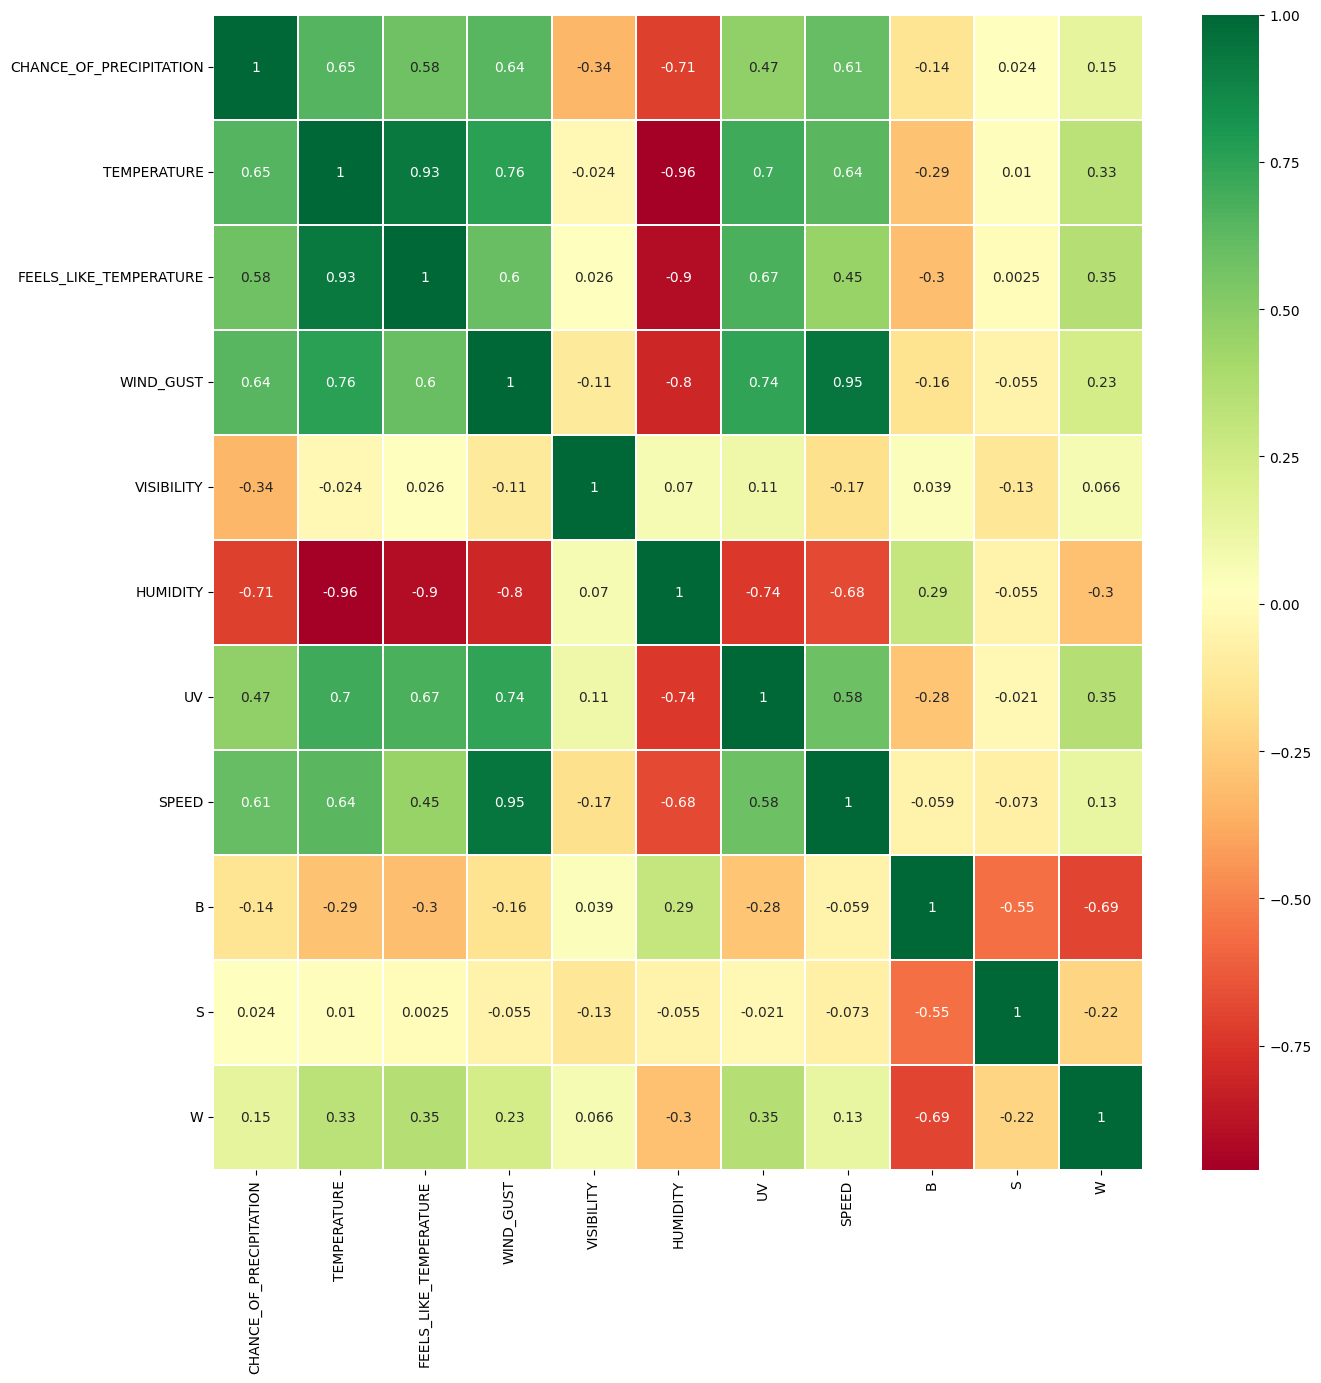

In [9]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(),linewidths=0.30,cmap ='RdYlGn',annot=True)
plt.show()

In [10]:
y = (df['CHANCE_OF_PRECIPITATION']).astype(int)
fields = list(df.columns[:-1])  # everything except "color"
correlations = df[fields].corrwith(y)
correlations.sort_values(inplace=True)
correlations

<ipython-input-10-ce4ca65ef9b1>:3: FutureWarning: The default value of numeric_only in DataFrame.corrwith is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlations = df[fields].corrwith(y)


HUMIDITY                  -0.709831
VISIBILITY                -0.337861
B                         -0.143129
S                          0.024462
UV                         0.473854
FEELS_LIKE_TEMPERATURE     0.575921
SPEED                      0.606520
WIND_GUST                  0.644059
TEMPERATURE                0.653736
CHANCE_OF_PRECIPITATION    1.000000
dtype: float64

The correlation between features and the target variable is quite high, especially HUMIDITY, TEMPERATURE, TEMPERATURE

## Train/Test Split

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state = 123)

Divide 2 sets of train and test with the ratio of 80% train and 20% test, with random_state = 123

##### Create a function to calculate model evaluation parameters including:
- accuracy
- recall
- precision
- f1score

In [12]:
def evaluate_metrics(yt, yp):
    results_pos = {}
    results_pos['accuracy'] = accuracy_score(yt, yp)
    precision, recall, f_beta, _ = precision_recall_fscore_support(yt, yp, average='binary')
    results_pos['recall'] = recall
    results_pos['precision'] = precision
    results_pos['f1score'] = f_beta
    return results_pos

## SVM

In [13]:
params_grid = {
    'C': [1, 10, 100],
    'kernel': ['poly', 'rbf', 'sigmoid']
}

In [14]:
model = SVC()

In [15]:
# Define a GridSearchCV to search the best parameters
grid_search = GridSearchCV(estimator = model,
                           param_grid = params_grid,
                           scoring='f1',
                           cv = 3)
# Search the best parameters with training data
grid_search.fit(X_train, y_train.values.ravel())
best_params = grid_search.best_params_

In [16]:
best_params

{'C': 10, 'kernel': 'rbf'}

Best parameter for SVM in this model is 'C': 10, 'kernel': 'rbf

In [17]:
svm = SVC(C=10, kernel='rbf')
svm.fit(X_train, y_train.values.ravel())
preds = svm.predict(X_test)
acc_svm=evaluate_metrics(y_test, preds)

In [18]:
acc_svm

{'accuracy': 0.9156626506024096,
 'recall': 0.975609756097561,
 'precision': 0.8695652173913043,
 'f1score': 0.9195402298850575}

In [47]:
cm_svm = confusion_matrix(y_test, preds)

***Based on these metrics, this SVM model has a relatively good performance. High accuracy, together with recall and precision are quite close, showing that the model has the ability to classify accurate and uniform predictions on both positive and negative classes. A high F1-score also indicates that the model strikes a good balance between precision and recall. However, for a more comprehensive assessment of the model, it is necessary to consider other factors such as the confusion matrix and the specific characteristics of the data set.***

## Neural Network

In [20]:
tf.__version__

'2.12.0'

In [31]:
model = models.Sequential([
    layers.Dense(64, activation='relu', input_shape=(10,)),  # input_shape là kích thước của dữ liệu đầu vào
    layers.Dense(32, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

In [35]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [33]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 64)                704       
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 dense_5 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2,817
Trainable params: 2,817
Non-trainable params: 0
_________________________________________________________________


In [36]:
model.fit(X_train, y_train, epochs=10, batch_size=32)

Epoch 1/10
11/11 [==============================] - 1s 5ms/step - loss: 0.7121 - accuracy: 0.4955
Epoch 2/10
11/11 [==============================] - 0s 4ms/step - loss: 0.6588 - accuracy: 0.5045
Epoch 3/10
11/11 [==============================] - 0s 4ms/step - loss: 0.6133 - accuracy: 0.7915
Epoch 4/10
11/11 [==============================] - 0s 4ms/step - loss: 0.5708 - accuracy: 0.8338
Epoch 5/10
11/11 [==============================] - 0s 4ms/step - loss: 0.5247 - accuracy: 0.8550
Epoch 6/10
11/11 [==============================] - 0s 4ms/step - loss: 0.4828 - accuracy: 0.8640
Epoch 7/10
11/11 [==============================] - 0s 4ms/step - loss: 0.4428 - accuracy: 0.8671
Epoch 8/10
11/11 [==============================] - 0s 4ms/step - loss: 0.4097 - accuracy: 0.8550
Epoch 9/10
11/11 [==============================] - 0s 4ms/step - loss: 0.3821 - accuracy: 0.8520
Epoch 10/10
11/11 [==============================] - 0s 4ms/step - loss: 0.3619 - accuracy: 0.8610


In [37]:
y_pred = model.predict(X_test)


3/3 [==============================] - 0s 4ms/step


In [41]:
threshold = 0.5
y_pred = np.where(y_pred >= threshold, 1, 0)


In [42]:
acc_nn=evaluate_metrics(y_test, y_pred)

In [43]:
acc_nn

{'accuracy': 0.8795180722891566,
 'recall': 0.926829268292683,
 'precision': 0.8444444444444444,
 'f1score': 0.8837209302325582}

In [48]:
cm_nn = confusion_matrix(y_test, y_pred)

### Evaluate

In [50]:
acc_svm

{'accuracy': 0.9156626506024096,
 'recall': 0.975609756097561,
 'precision': 0.8695652173913043,
 'f1score': 0.9195402298850575}

In [51]:
acc_nn

{'accuracy': 0.8795180722891566,
 'recall': 0.926829268292683,
 'precision': 0.8444444444444444,
 'f1score': 0.8837209302325582}

If we only evaluate based on evaluation indicators, we can easily see that for this simple classification problem and not much data, the SVM model is slightly better than the Neural Network model.

**For a more detailed assessment we will look at the confusion matrix**

In [45]:
cm_nn

array([[35,  7],
       [ 3, 38]])

In [49]:
cm_svm

array([[36,  6],
       [ 1, 40]])

Neural Network:

- TN = 35
- FN = 7
- TP = 38
- FP = 3

SVM:

- TN = 36
- FN = 6
- TP = 40
- FP = 1

Looking at the above values, we can see that the SVM model has a larger number of True Negatives (TN) and True Positives (TP) than the Neural Network, and at the same time has a larger number of False Negatives (FN) and False Positives. (FP) is lower. This shows that the SVM model has the ability to accurately classify data points in the positive and negative classes better than the Neural Network.

***We can draw the following conclusions:***
- The Neural Network model may be more modern, but depending on the type of data and each problem, the traditional Machine Learning model can still do well.
- The data of this article is relatively small, so it may also be the reason why the Neural Network model does not show its full capabilities.
- SVM binary classification problem can be better, but Neural Network can handle better in more diverse problems